In [1]:
import numpy as np
import pandas as pd
import nltk

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
sns.set()

%matplotlib inline

In [3]:
russia_df = pd.read_csv('../tweets.csv', index_col = 'user_key')
russia_df['created_datetime'] = pd.to_datetime(russia_df['created_str'])
russia_df['created_datetime'] = russia_df['created_datetime'] - pd.Timedelta(hours=5)
del russia_df['created_str']
russia_df.reset_index(inplace=True)
russia_df.set_index('tweet_id', inplace=True)
russia_df.sample(5)

,user_key,user_id,created_at,retweet_count,retweeted,favorite_count,text,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,created_datetime
tweet_id,,,,,,,,,,,,,,,
8.549849e+17,queenofthewo,2.584153e+09,1.492679e+12,NaN,NaN,NaN,#StonedComicBooks As comics are Drama represen...,NaN,"[""StonedComicBooks""]",[],POSTED,[],NaN,NaN,2017-04-20 04:07:31
8.054170e+17,brianaregland,1.868496e+09,1.480861e+12,NaN,NaN,NaN,RT @SuperHeroSpeak: listen to how @SchumacherI...,NaN,"[""podernfamil""]",[],POSTED,[],NaN,NaN,2016-12-04 09:22:20
8.837092e+17,baobaeham,1.658421e+09,1.499528e+12,NaN,NaN,NaN,RT @StephieGilley: This evil world makes being...,NaN,[],[],POSTED,[],NaN,NaN,2017-07-08 10:27:48
7.778820e+17,ameliebaldwin,1.679279e+09,1.474296e+12,0.0,False,0.0,RT @DanRiehl: Obama plans big boost in refugee...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],"[""http://usat.ly/2cnGBUB"",""http://usat.ly/2cnG...",POSTED,"[""usatoday"",""danriehl""]",7.778607e+17,NaN,2016-09-19 09:48:14
7.123475e+17,cookncooks,1.710805e+09,1.458672e+12,NaN,NaN,NaN,#IslamKills #prayforbrussels :(,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN,2016-03-22 13:37:32


### TF-IDF for non RT tweets ###

In [3]:
non_rt_tweets = russia_df[~russia_df['text'].str.contains('RT', na=False)]['text']
non_rt_tweets = non_rt_tweets.dropna()

In [ ]:
SSEs = []

vectorizor = TfidfVectorizer(stop_words='english', ngram_range=(1,3), min_df=5)
vectorized_tweets = vectorizor.fit_transform(non_rt_tweets)
clustered_tweets = non_rt_tweets.reset_index()
for k in range(3,20):
    print('KM with {} clusters.'.format(k))
    model = KMeans(n_clusters=k)
    model.fit(vectorized_tweets)
    labels = model.labels_
    clustered_tweets['cluster_k{}'.format(k)] = labels
    clustered_tweets.to_csv('../csvs/km_tfidf.csv')
    #Sil_coefs.append(silhouette_score(vectorized_tweets, labels, metric='euclidean'))
    SSEs.append(model.inertia_) 
    

In [24]:
for k in range(25,51,5):
    print('KM with {} clusters.'.format(k))
    model = KMeans(n_clusters=k)
    model.fit(vectorized_tweets)
    labels = model.labels_
    clustered_tweets['cluster_k{}'.format(k)] = labels
    clustered_tweets.to_csv('../csvs/km_tfidf.csv')
    #Sil_coefs.append(silhouette_score(vectorized_tweets, labels, metric='euclidean'))
    SSEs.append(model.inertia_) 

KM with 25 clusters.
KM with 30 clusters.
KM with 35 clusters.
KM with 40 clusters.
KM with 45 clusters.
KM with 50 clusters.


In [ ]:
Sil_coefs = []
for k in range(3,20):
    print(k)
    Sil_coefs.append(silhouette_score(vectorized_tweets, 
                                      clustered_tweets['cluster_k{}'.format(k)],
                                      metric='euclidean',
                                     sample_size=10000))

In [25]:
for k in range(25,51,5):
    print(k)
    Sil_coefs.append(silhouette_score(vectorized_tweets, 
                                      clustered_tweets['cluster_k{}'.format(k)],
                                      metric='euclidean',
                                     sample_size=10000))

25
30
35
40
45
50


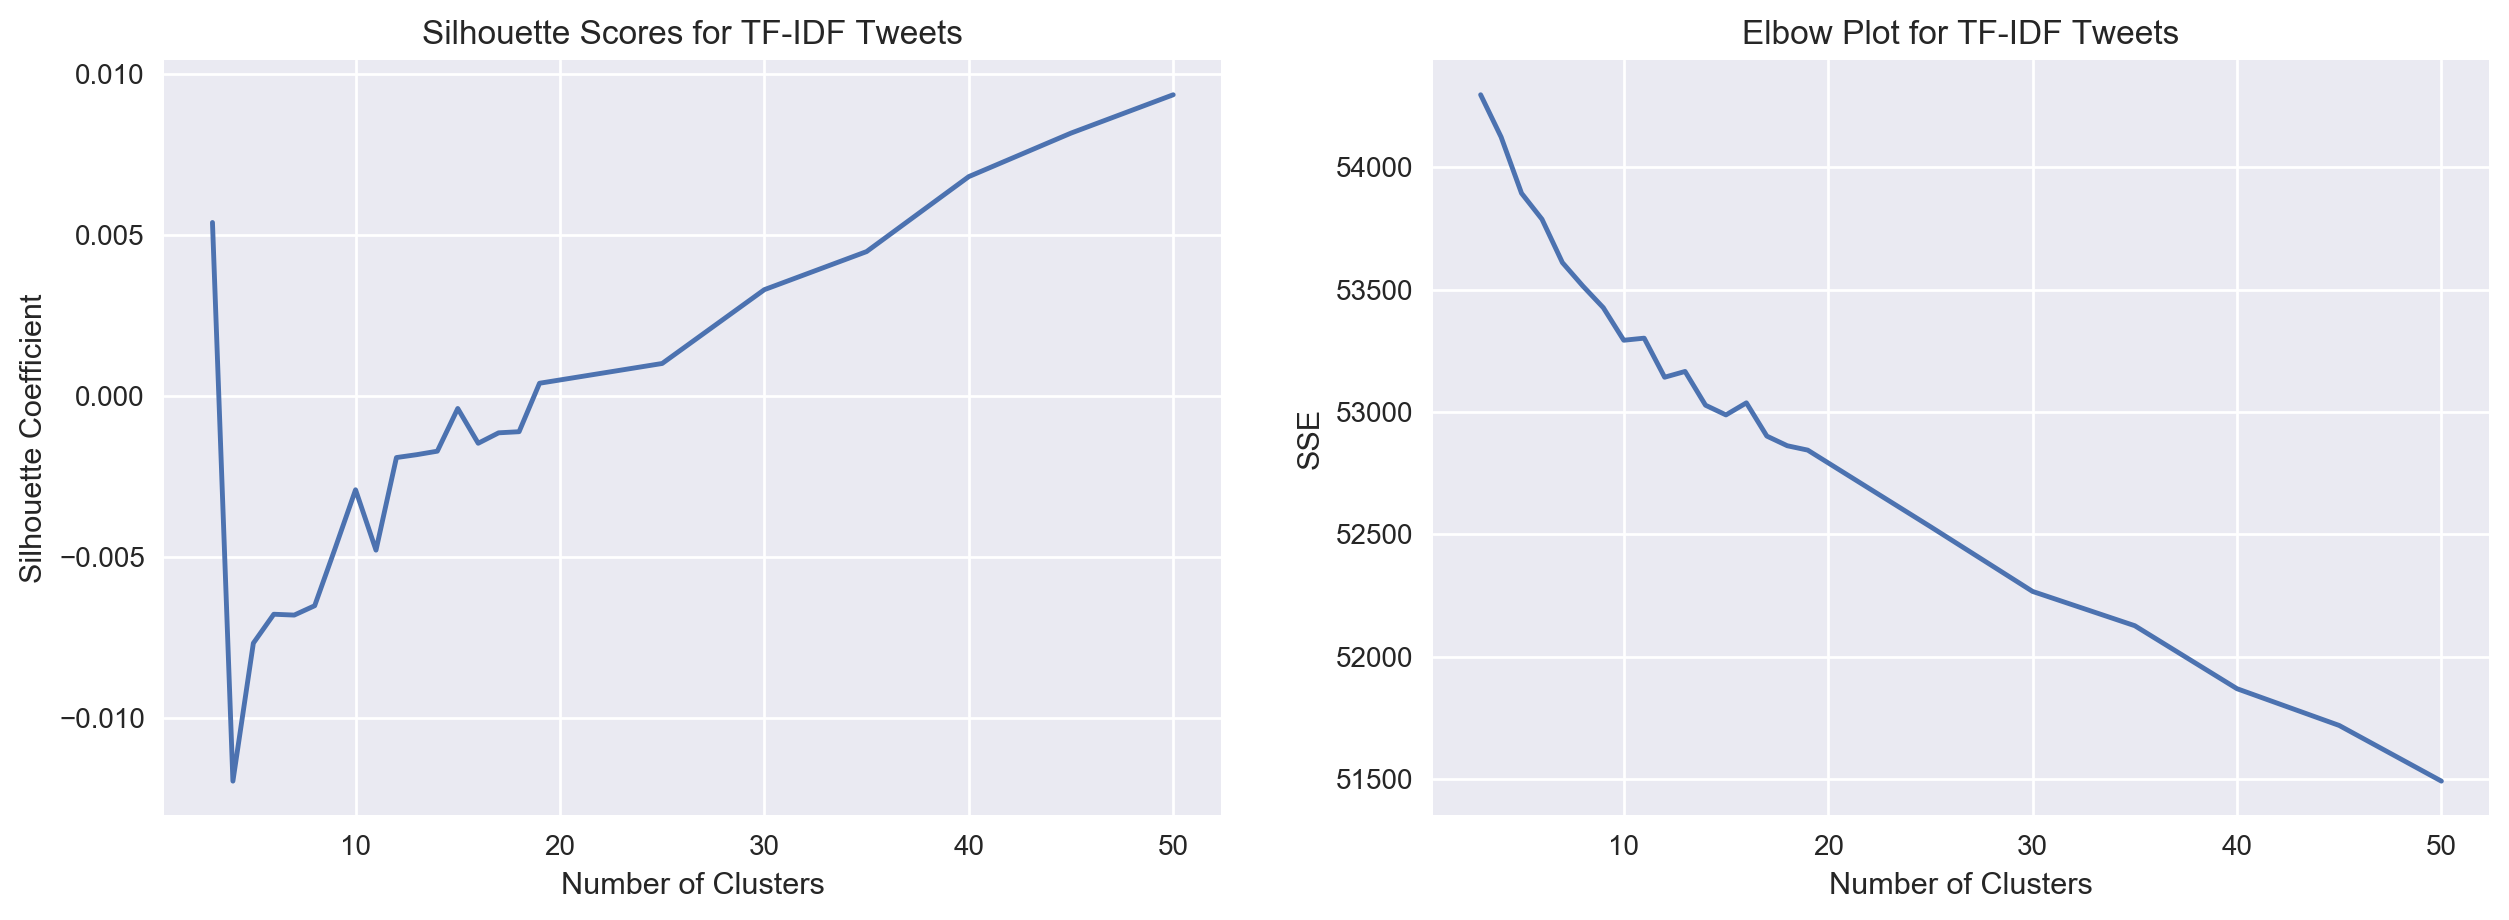

In [27]:
k_clusters = list(range(3,20)) + list(range(25,51,5))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_title('Silhouette Scores for TF-IDF Tweets')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Silhouette Coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_title('Elbow Plot for TF-IDF Tweets')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('SSE');

In [29]:
pd.DataFrame(vectorized_tweets.todense(), 
             columns=vectorizor.get_feature_names()
            ).head()

,00,000,000 000,000 emails,000 homeless,000 people,01,02,03,04,...,трампа https,трампом,фбр,хиллари,хиллари клинтон,хиллари клинтон https,что,чтобы,штатах,это
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
